# 实验4 基于自动阈值选择的图像分割

## 一、导入图片及方法库

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from GeneticAlgorithm import *

Text(0.5, 1.0, 'color')

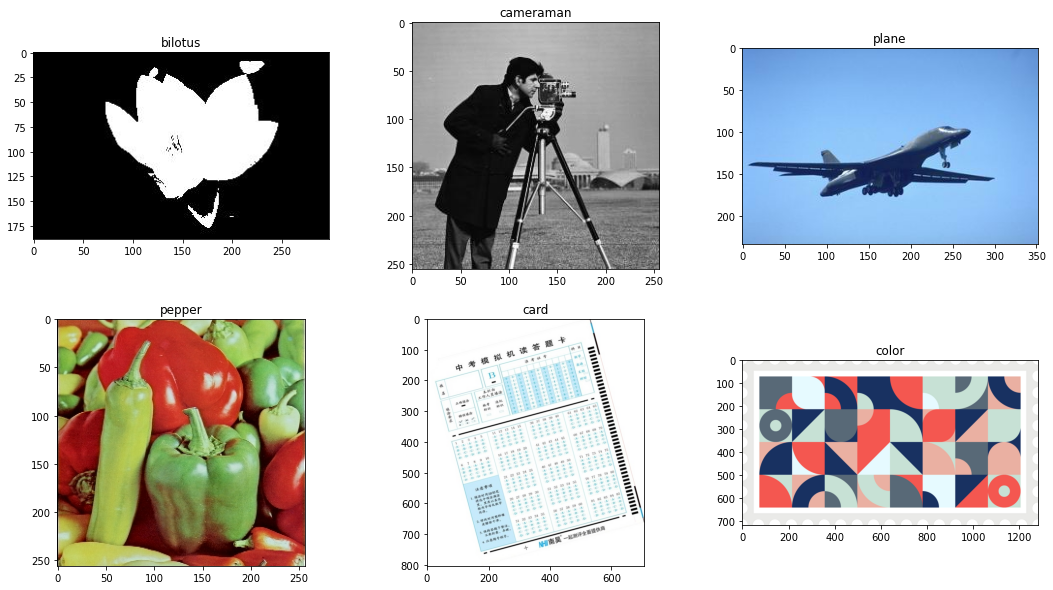

In [3]:
path = '.\Images\Lab4\\'

bilotus = plt.imread(path+'bilotus1.jpg')
cameraman = plt.imread(path+'cameraman.jpg')
card = plt.imread(path+'card4.jpg')
pepper = plt.imread(path+'Peppers.jpg')
color = plt.imread(path+'color.png')
plane = plt.imread(path+'plane1.jpg')

plt.rcParams['figure.figsize'] = (18.0, 10.0) 
plt.subplot(2,3,1)
plt.imshow(bilotus, 'gray')
plt.title('bilotus')
plt.subplot(2,3,2)
plt.imshow(cameraman, 'gray')
plt.title('cameraman')
plt.subplot(2,3,3)
plt.imshow(plane, 'gray')
plt.title('plane')
plt.subplot(2,3,4)
plt.imshow(pepper, 'gray')
plt.title('pepper')
plt.subplot(2,3,5)
plt.imshow(card, 'gray')
plt.title('card')
plt.subplot(2,3,6)
plt.imshow(color, 'gray')
plt.title('color')

## 二、高斯噪声函数定义

In [3]:
def gasuss_noise(image, mean=0, var=0.002, vis=0):
    '''
        添加高斯噪声
        mean : 均值
        var : 方差
    '''
    image = np.array(image/255, dtype=float)
    noise = np.random.normal(mean, var ** 0.5, image.shape)
    out = image + noise
    if out.min() < 0:
        low_clip = -1.
    else:
        low_clip = 0.
    out = np.clip(out, low_clip, 1.0)
    out = np.uint8(out*255)
    if(vis):
        plt.imshow("gasuss", out)

    return out

## 三、实验结果

### 1. 单阈值分割

#### 1.1 无噪图片

Basic 的阈值为127
Ostu 的阈值为38


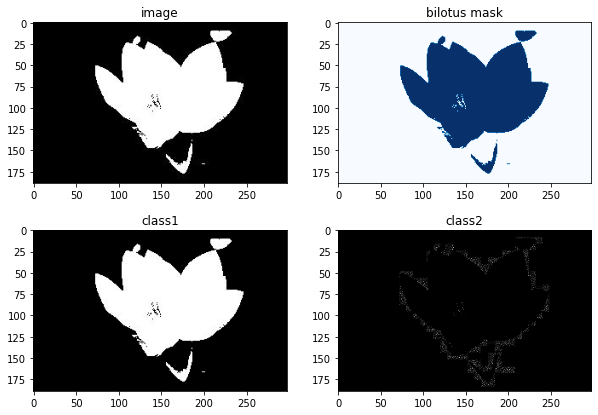

<Figure size 720x504 with 0 Axes>

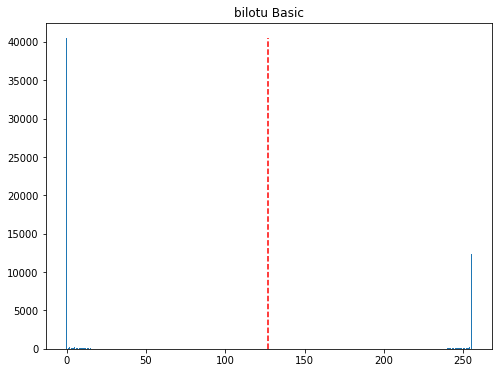

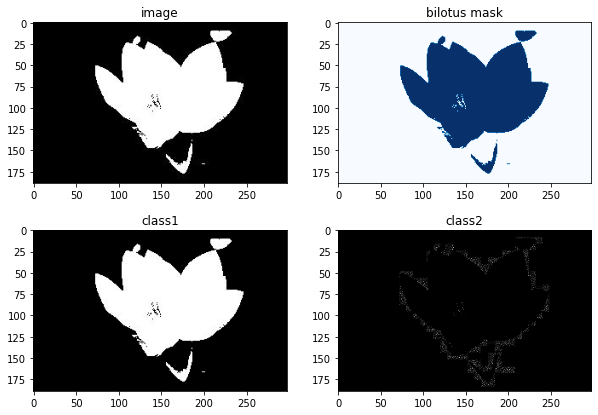

<Figure size 720x504 with 0 Axes>

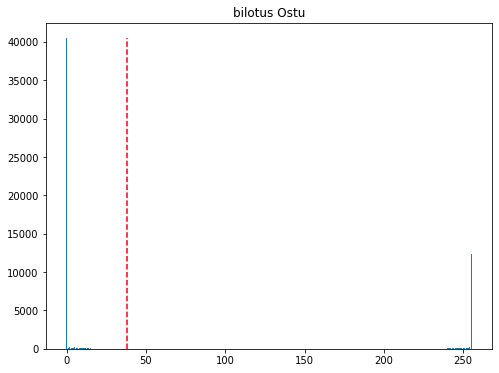

In [4]:
plt.rcParams['figure.figsize'] = (10.0, 7.0) 
bilotus_ad = AdThreshold(bilotus)
thres0 = bilotus_ad.Basic()
bilotus_ad.visualization('bilotus')
bilotus_ad.plotHist('bilotu Basic')
thres0 = bilotus_ad.Ostu()
bilotus_ad.visualization('bilotus')
bilotus_ad.plotHist('bilotus Ostu')

(1) 前两张图片是**基本全局阈值分割算法**的结果，后两张是**最优全局阈值分割**的结果。

(2) 第一张图的image表示原图像，mask表示两类中一类的掩膜(掩膜区域是蓝色)，另一类是其补集，class1和class2表示的是分割结果(选中区域保留原来的灰度值,其他置为0,因此class2出现花内外均为黑色的现象)。第二张图是该图像的直方图，红色虚线表示Basic得到的灰度阈值。


(3) Basic全局阈值处理的整体思路：选取整幅图像的中间灰度值做全局阈值的初始值，之后通过被阈值切出的两类的平均灰度值更新全局阈值，反复迭代，直到全局阈值变化差小于预设值，完成分割。


(4) Ostu的基本思路是遍历0到255所有灰度值，找出对应类间方差最大的灰度作为阈值。

(5) 从分割mask和直方图可以看出，视觉上，这张图片被比较好地分割出前景和背景；从统计意义上，两个灰度峰值被单独完整地切开，分割出的两类不粘连，效果好。

(6) 由于该图像中部的灰度值为0, 这导致中间的大部分灰度值的类间方差相等且最大，而Basic是取两类平均灰度的均值, Ostu则是取最邻近0的灰度(编写的算法决定), 因此出现了较大的阈值差异, 但分割结果没有差异。

#### 1.2 有噪图片

Basic 的阈值为89
Ostu 的阈值为89


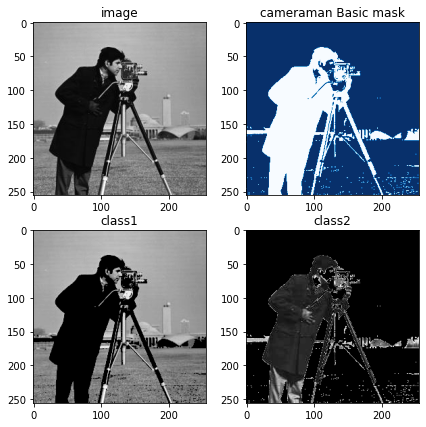

<Figure size 504x504 with 0 Axes>

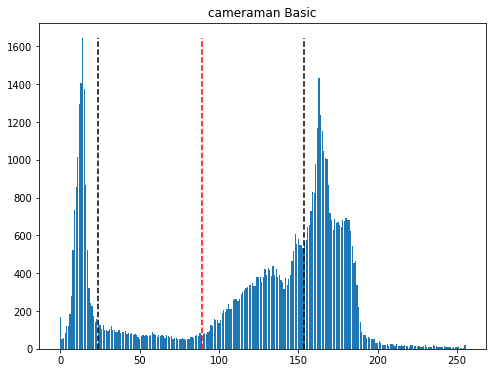

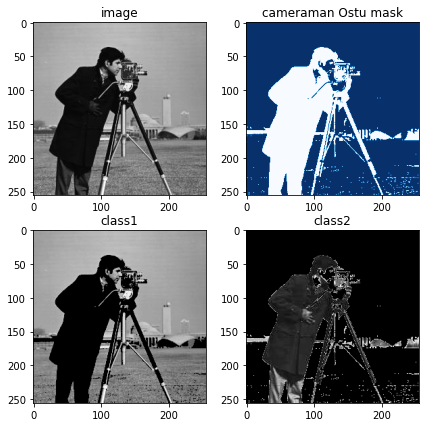

<Figure size 504x504 with 0 Axes>

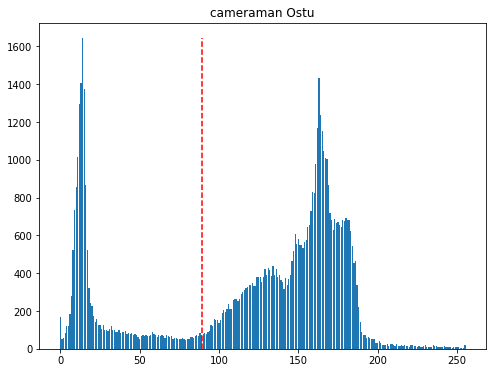

In [5]:
# 无噪声
plt.rcParams['figure.figsize'] = (7.0, 7.0) 
cameraman_ad = AdThreshold(cameraman)
cameraman_ad.Basic()
cameraman_ad.visualization('cameraman Basic')
cameraman_ad.plotHist('cameraman Basic', 1)

cameraman_ad = AdThreshold(cameraman)
cameraman_ad.Ostu()
cameraman_ad.visualization('cameraman Ostu')
cameraman_ad.plotHist('cameraman Ostu')

第二张图片的两条黑色虚线是Basic求迭代到的两类平均灰度，红色虚线是求得的阈值，可以看到两者的关系与原理一致，同时可以看到Ostu和Basic求到的阈值一样。

Basic 的阈值为101
Ostu 的阈值为101


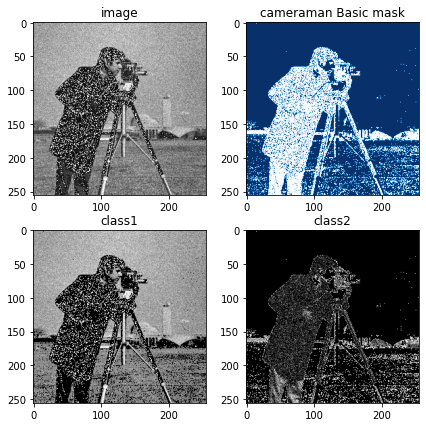

<Figure size 504x504 with 0 Axes>

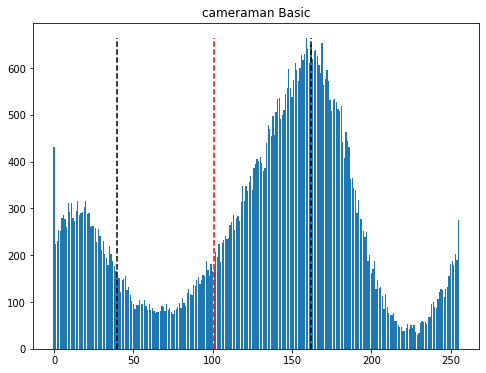

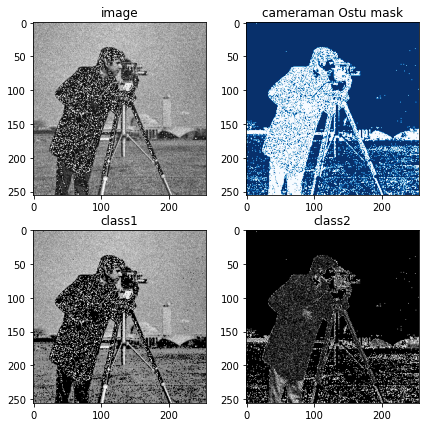

<Figure size 504x504 with 0 Axes>

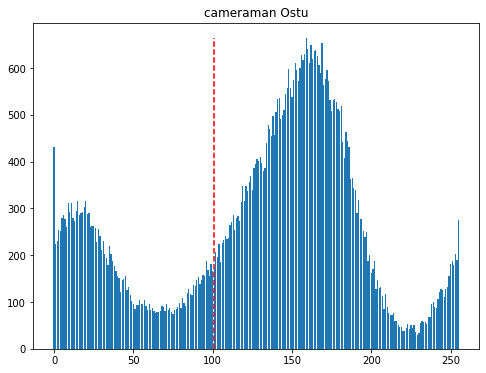

In [6]:
plt.rcParams['figure.figsize'] = (7.0, 7.0) 
# 有噪声Basic
cameraman_noise = gasuss_noise(cameraman, var=0.005)
cameraman_noise_ad = AdThreshold(cameraman_noise)
cameraman_noise_ad.Basic()
cameraman_noise_ad.visualization('cameraman Basic')
cameraman_noise_ad.plotHist('cameraman Basic', 1)
# 有噪声Ostu
cameraman_noise_ad.Ostu()
cameraman_noise_ad.visualization('cameraman Ostu')
cameraman_noise_ad.plotHist('cameraman Ostu')

观察阈值, 发现加入噪声后, 求得的阈值足足变化了12; 观察mask, 白色的人身上每有一块蓝斑，就代表错分割。因此，可以看出Basic和Ostu方法都会受到噪声的影响。

Basic 的阈值为136
Ostu 的阈值为137


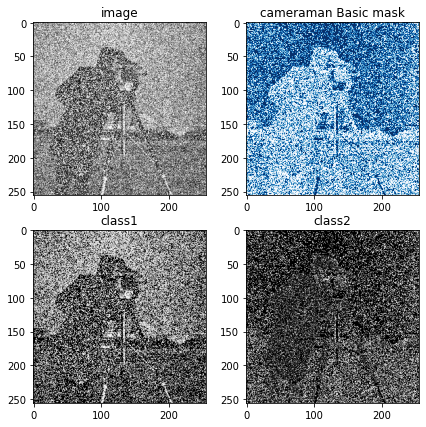

<Figure size 504x504 with 0 Axes>

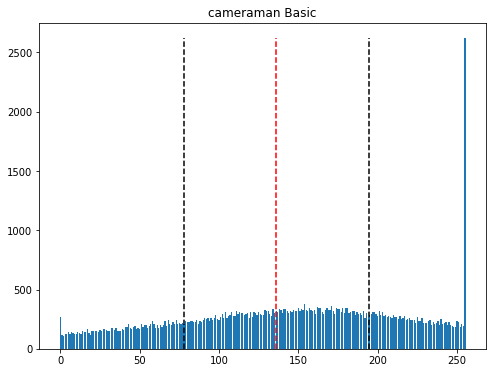

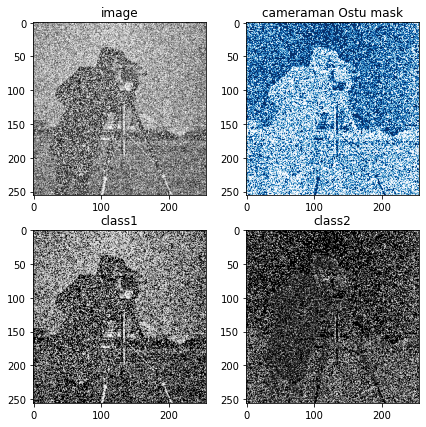

<Figure size 504x504 with 0 Axes>

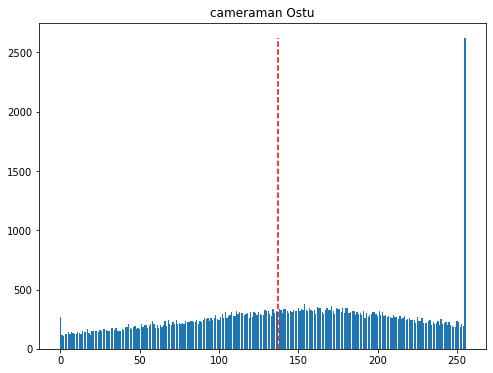

In [7]:
plt.rcParams['figure.figsize'] = (7.0, 7.0) 
# 有噪声Basic
cameraman_noise1 = gasuss_noise(cameraman, var=0.05)
cameraman_noise1_ad = AdThreshold(cameraman_noise1)
cameraman_noise1_ad.Basic()
cameraman_noise1_ad.visualization('cameraman Basic')
cameraman_noise1_ad.plotHist('cameraman Basic', 1)
# 有噪声Ostu
cameraman_noise1_ad.Ostu()
cameraman_noise1_ad.visualization('cameraman Ostu')
cameraman_noise1_ad.plotHist('cameraman Ostu')

观察上面的结果, 此时噪声的能量被进一步加大, 可以得出结论: 当噪声干扰模糊了直方图上两类的波谷, 使得简单阈值处理已经基本无法分割出目标。

Basic 的阈值为93
Ostu 的阈值为94


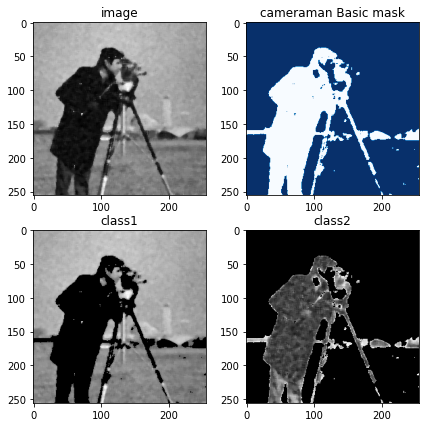

<Figure size 504x504 with 0 Axes>

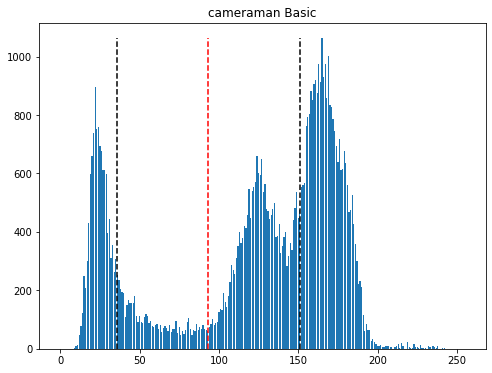

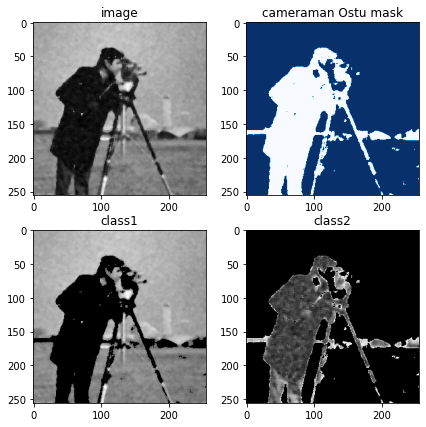

<Figure size 504x504 with 0 Axes>

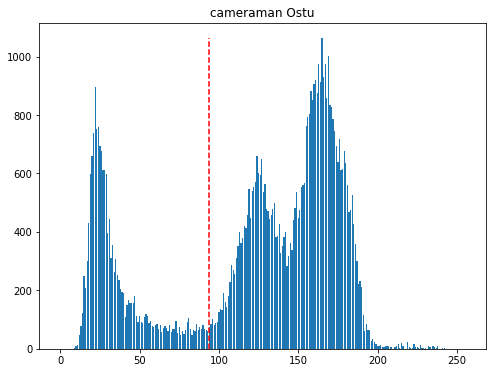

In [8]:
plt.rcParams['figure.figsize'] = (7.0, 7.0) 
cameraman_afblur = cv2.medianBlur(cameraman_noise, 5)
# 中值滤波后
cameraman_afblur_ad = AdThreshold(cameraman_afblur)
cameraman_afblur_ad.Basic()
cameraman_afblur_ad.visualization('cameraman Basic')
cameraman_afblur_ad.plotHist('cameraman Basic', 1)
# 中值滤波后
cameraman_afblur_ad.Ostu()
cameraman_afblur_ad.visualization('cameraman Ostu')
cameraman_afblur_ad.plotHist('cameraman Ostu')

可以看到, 进过中值滤波器后，直方图的波谷再次出现, 分割阈值93也更接近无噪声的89, 视觉上分割mask也基本消除了凌乱的误分割斑。

#### 1.3 彩色图像

**1.3.1 将彩色图像灰度化, 在灰度图像上进行Basic和Ostu得到阈值。**

Basic 的阈值为113
Ostu 的阈值为113


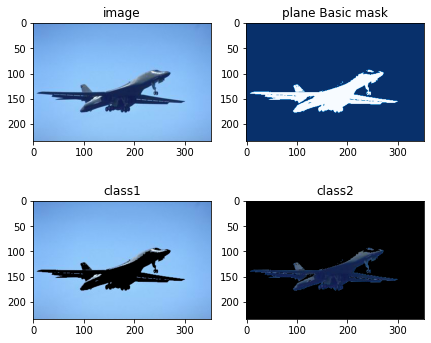

<Figure size 504x432 with 0 Axes>

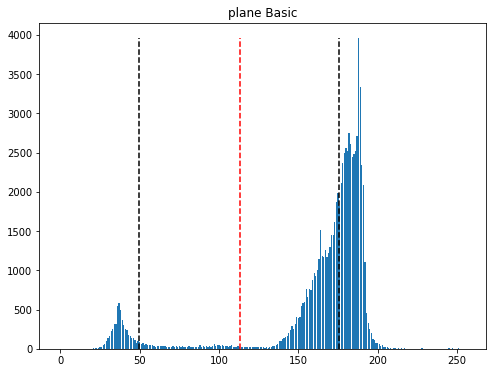

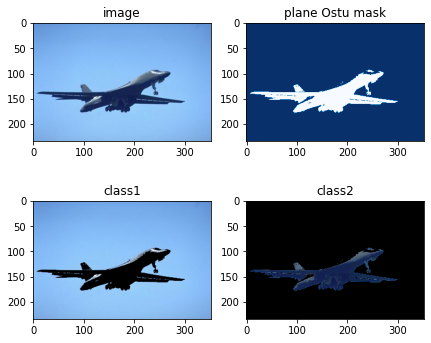

<Figure size 504x432 with 0 Axes>

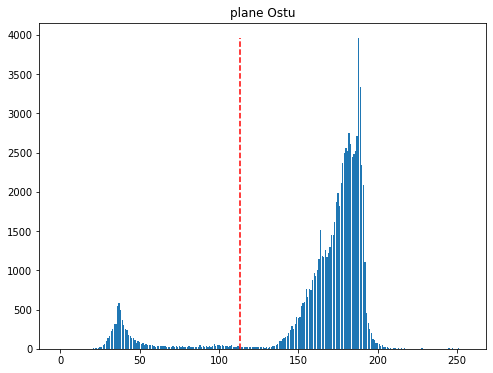

In [9]:
plt.rcParams['figure.figsize'] = (7.0, 6.0) 
plane_ad = AdThreshold(plane, HSV=3)
plane_ad.Basic()
plane_ad.visualization('plane Basic')
plane_ad.plotHist('plane Basic', 1)
plane_ad.Ostu()
plane_ad.visualization('plane Ostu')
plane_ad.plotHist('plane Ostu')

**1.3.2 将彩色图像转换到HSV域, 用H通道做Basic和Ostu得到阈值。**

Basic 的阈值为86
Ostu 的阈值为109


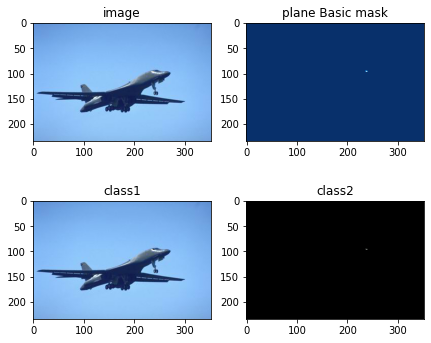

<Figure size 504x432 with 0 Axes>

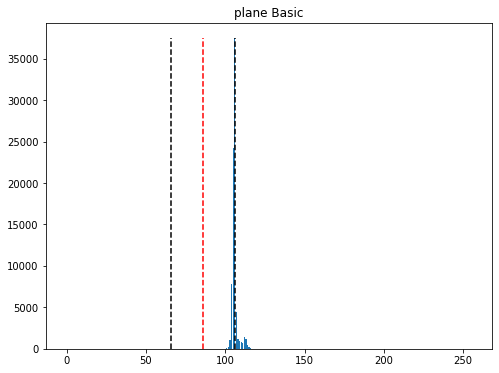

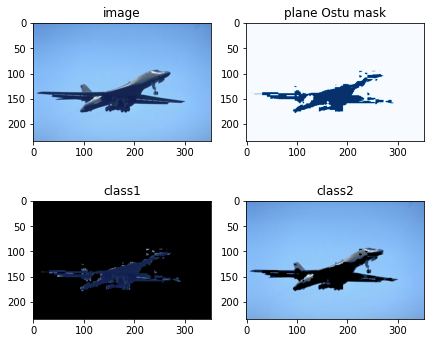

<Figure size 504x432 with 0 Axes>

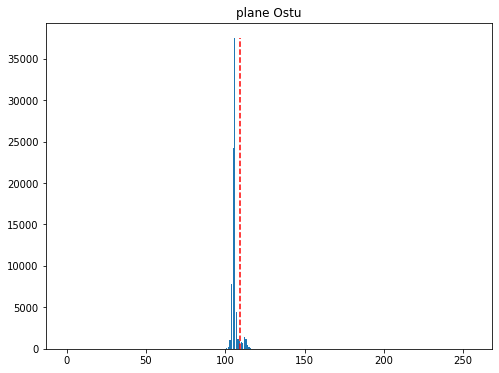

In [10]:
plt.rcParams['figure.figsize'] = (7.0, 6.0) 
plane_ad = AdThreshold(plane, HSV=0)
plane_ad.Basic()
plane_ad.visualization('plane Basic')
plane_ad.plotHist('plane Basic', 1)
plane_ad.Ostu()
plane_ad.visualization('plane Ostu')
plane_ad.plotHist('plane Ostu')

**1.3.3 将彩色图像转换到HSV域, 用I通道做Basic和Ostu得到阈值。**

Basic 的阈值为154
Ostu 的阈值为154


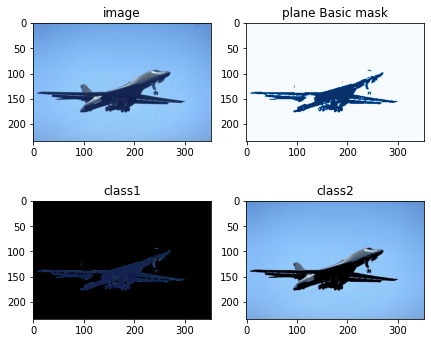

<Figure size 504x432 with 0 Axes>

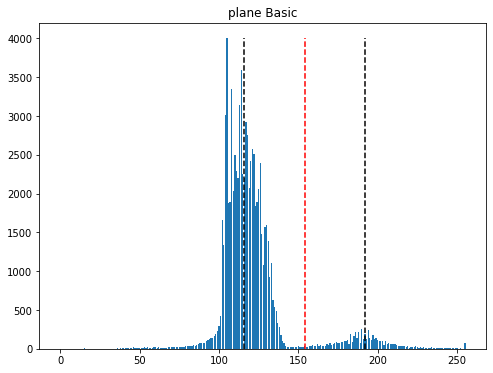

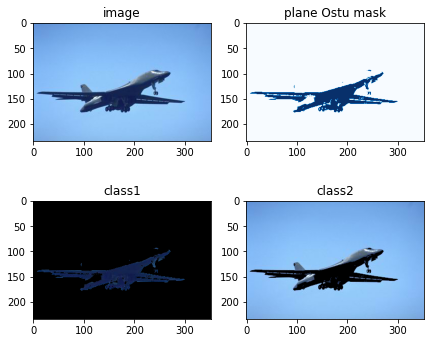

<Figure size 504x432 with 0 Axes>

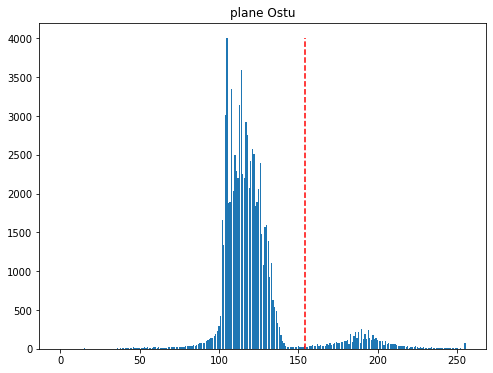

In [15]:
plt.rcParams['figure.figsize'] = (7.0, 6.0) 
plane_ad = AdThreshold(plane, HSV=1)
plane_ad.Basic()
plane_ad.visualization('plane Basic')
plane_ad.plotHist('plane Basic', 1)
plane_ad.Ostu()
plane_ad.visualization('plane Ostu')
plane_ad.plotHist('plane Ostu')

**1.3.4 将彩色图像转换到HSV域, 用V通道做Basic和Ostu得到阈值。**

Basic 的阈值为169
Ostu 的阈值为169


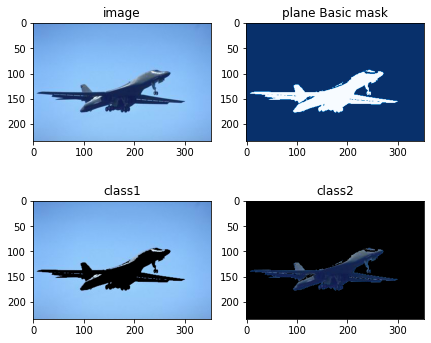

<Figure size 504x432 with 0 Axes>

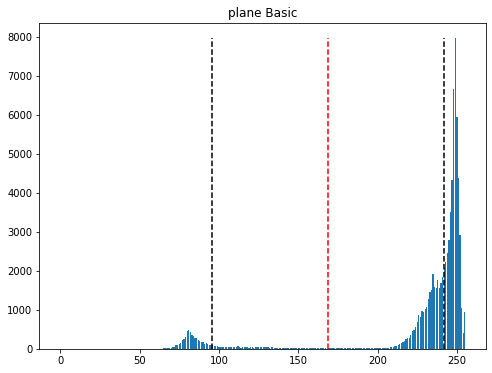

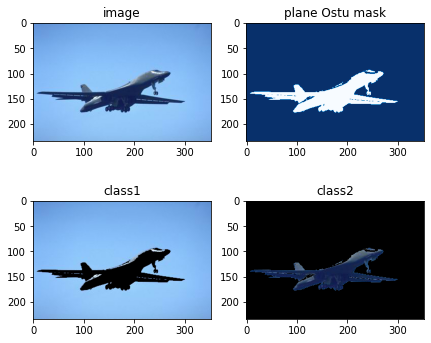

<Figure size 504x432 with 0 Axes>

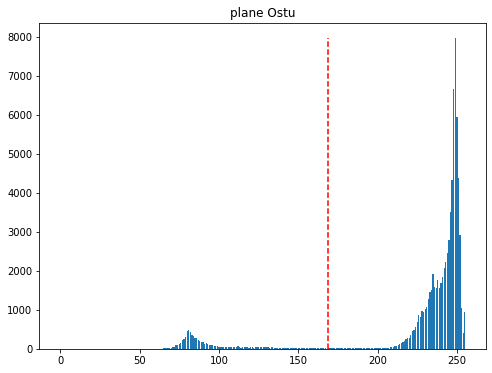

In [16]:
plt.rcParams['figure.figsize'] = (7.0, 6.0) 
plane_ad = AdThreshold(plane, HSV=2)
plane_ad.Basic()
plane_ad.visualization('plane Basic')
plane_ad.plotHist('plane Basic', 1)
plane_ad.Ostu()
plane_ad.visualization('plane Ostu')
plane_ad.plotHist('plane Ostu')

**1.3.5 借鉴matlab的实现方式, 将图片的三通道都拿去统计得到直方图, 在此基础上求Ostu的灰度均值、先验概率等, 其次mask由转成的灰度图像和阈值得来。**

(由于编写Basic是直接使用的通道矩阵来求平均灰度而非直方图, 因此Basic不会受到该方法的影响, 因此在此不做对比)

Ostu 的阈值为168


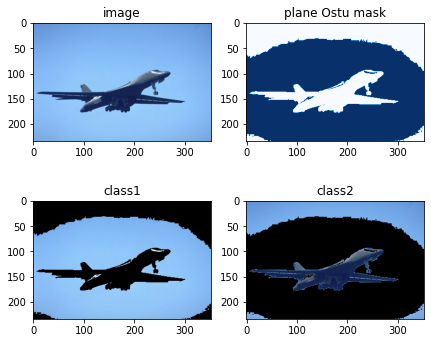

<Figure size 504x432 with 0 Axes>

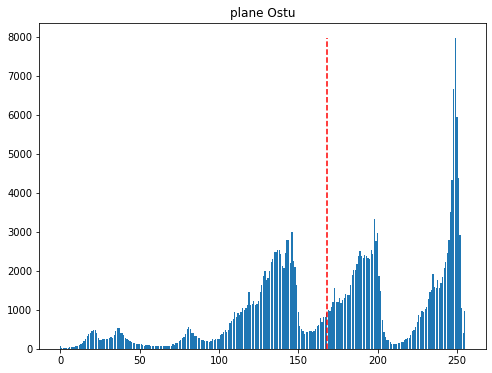

In [17]:
plt.rcParams['figure.figsize'] = (7.0, 6.0) 
plane_ad = AdThreshold(plane, HSV=4)
plane_ad.Ostu()
plane_ad.visualization('plane Ostu')
plane_ad.plotHist('plane Ostu')

**1.3.6 结论**

(1) 不管是使用HSV的S通道、V通道还是做灰度化, Basic和Ostu的求得的性能基本相当。而使用S通道做时两者差异较大, 这里猜想是由于初始化阈值时使用图像的中间灰度导致算法不收敛。(后面将进行验证)

(2) 对比可以看到, 使用灰度化和V通道(亮度)的**视觉**分割效果最好, 两者的结果相当, 这是因为两者刻画的概念近似, 但由于直方图(但形状近似)不同, 因此求得的阈值不同。但是否所有彩色图像的**视觉**分割效果都是这两种方法最佳, 下文将进行进一步研究。

(3) 可以看到matlab的Ostu方法, 虽然在直方图上能够达到最佳, 但是由于其是直接将三通道一同统计的直方图, 这样会进一步混乱图像的消息, 因此其得出的阈值并不能达到很好的分割结果。

**1.3.7 拓展1 Basic收敛问题**

将初始化阈值设置为最大阈值-10

最小灰度为:  24.0
中间灰度为:  84.0
Basic 的阈值为109
Ostu 的阈值为109


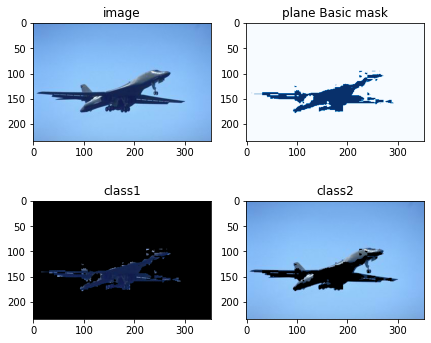

<Figure size 504x432 with 0 Axes>

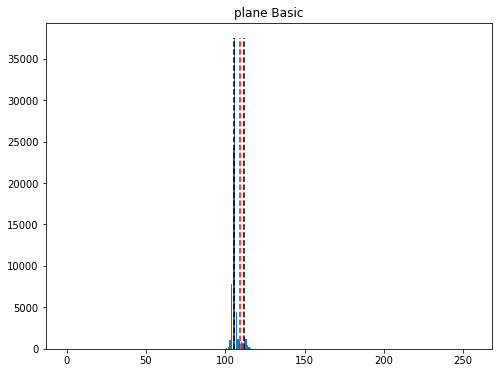

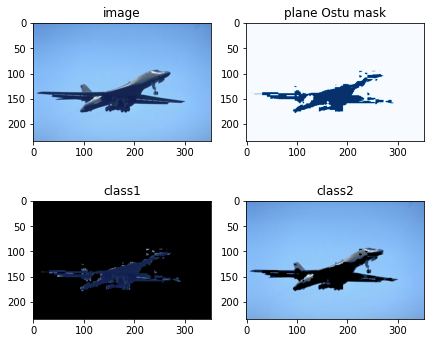

<Figure size 504x432 with 0 Axes>

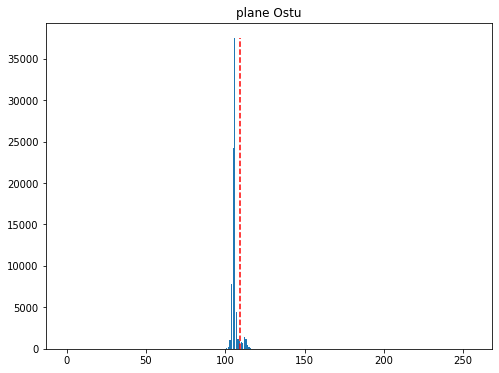

In [18]:
plt.rcParams['figure.figsize'] = (7.0, 6.0) 
plane_ad = AdThreshold(plane, HSV=0)
plane_ad.Basic(test=1)
plane_ad.visualization('plane Basic')
plane_ad.plotHist('plane Basic', 1)
plane_ad.Ostu()
plane_ad.visualization('plane Ostu')
plane_ad.plotHist('plane Ostu')

经过分析, 我猜想1.3.2中Basic算法收敛在89的原因是：阈值初始化使用的是图像的中间灰度, 而H通道的中间灰度处在84, 最小灰度在24; 从直方图可以看到中间灰度84已经基本处在了极小灰度与100以右的大灰度值的中间, 因此导致阈值无法收敛到100以右; 但是由于低灰度值的能量很少, 在直方图上甚至看不到, 因此其是可以忽略不记的, 更好的阈值应该处于100已右。

从这里可以发现对于Basic来说, 面对比较分散的直方图时, 其阈值初始化对其收敛目标是很重要的。而Ostu不存在此缺点。

**1.3.8 最优通道问题**

1. HSV的H通道

Ostu 的阈值为99


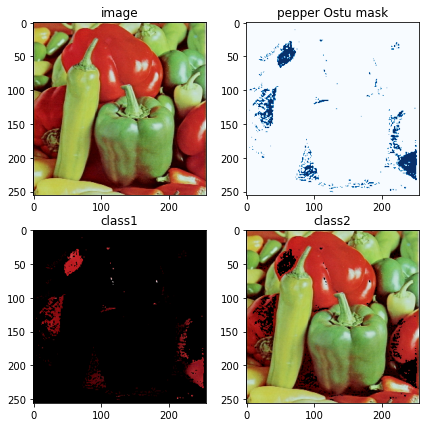

In [53]:
plt.rcParams['figure.figsize'] = (7.0, 7.0) 
pepper_ad = AdThreshold(pepper, HSV=0)
pepper_ad.Ostu()
pepper_ad.visualization('pepper Ostu')

2. HSV的S通道

Ostu 的阈值为169


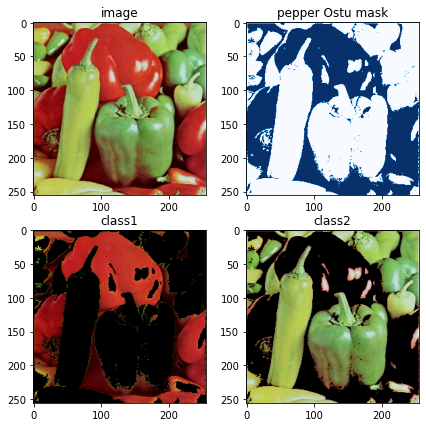

In [54]:
plt.rcParams['figure.figsize'] = (7.0, 7.0) 
pepper_ad = AdThreshold(pepper, HSV=1)
pepper_ad.Ostu()
pepper_ad.visualization('pepper Ostu')

3. HSV的V通道

Ostu 的阈值为137


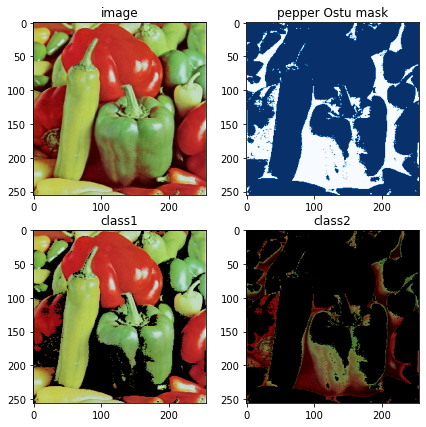

In [55]:
plt.rcParams['figure.figsize'] = (7.0, 7.0) 
pepper_ad = AdThreshold(pepper, HSV=2)
pepper_ad.Ostu()
pepper_ad.visualization('pepper Ostu')

4. 灰度图像

Ostu 的阈值为117


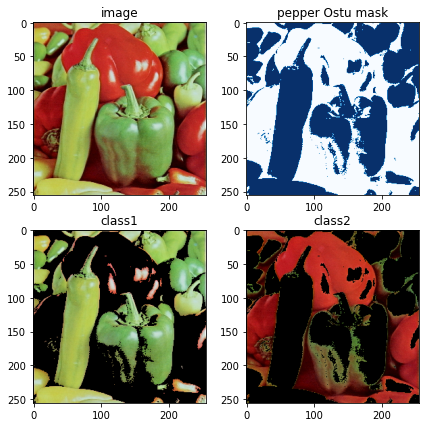

In [56]:
plt.rcParams['figure.figsize'] = (7.0, 7.0) 
pepper_ad = AdThreshold(pepper, HSV=3)
pepper_ad.Ostu()
pepper_ad.visualization('pepper Ostu')

5. 三通道一同计算直方图+灰度图

Ostu 的阈值为110


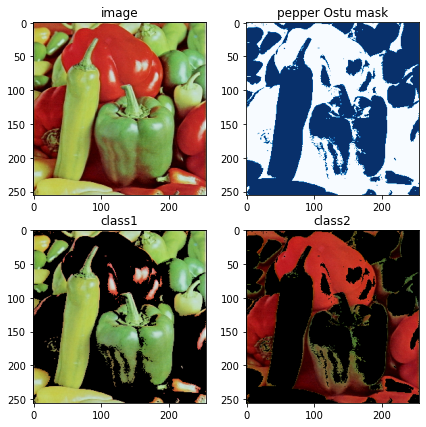

In [58]:
plt.rcParams['figure.figsize'] = (7.0, 7.0) 
pepper_ad = AdThreshold(pepper, HSV=4)
pepper_ad.Ostu()
pepper_ad.visualization('pepper Ostu')

从视觉上可以看到S通道的效果最好(饱和度), 只有他能将绿色辣椒比较好地分割出来。这是因为图像中不同的目标的饱和度差异更大一些, 如下图所示。

Text(0.5, 1.0, 'V')

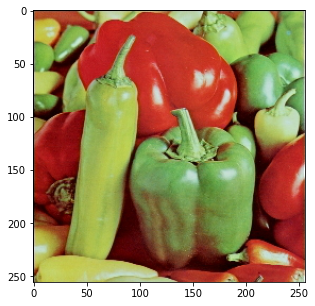

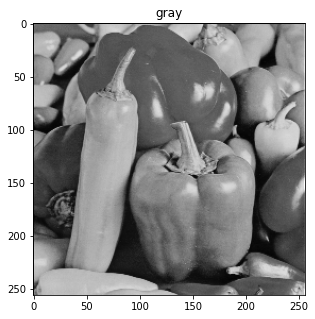

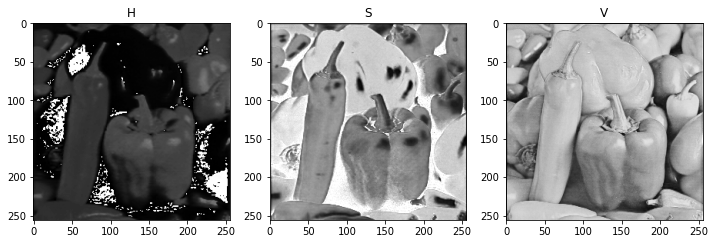

In [62]:
pepper_hsv = cv2.cvtColor(pepper, cv2.COLOR_RGB2HSV)
pepper_gray = cv2.cvtColor(pepper, cv2.COLOR_RGB2GRAY)
plt.rcParams["figure.figsize"]=(5,5)
plt.figure()
plt.imshow(pepper)
plt.figure()
plt.imshow(pepper_gray, 'gray')
plt.title('gray')
plt.rcParams["figure.figsize"]=(12,12)
plt.figure()
plt.subplot(1,3,1)
plt.imshow(pepper_hsv[:,:,0], 'gray')
plt.title('H')
plt.subplot(1,3,2)
plt.imshow(pepper_hsv[:,:,1], 'gray')
plt.title('S')
plt.subplot(1,3,3)
plt.imshow(pepper_hsv[:,:,2], 'gray')
plt.title('V')

### 2. 多阈值分割

#### 2.1 灰度图像

迭代进度：0.00%
迭代进度：10.00%
迭代进度：20.00%
迭代进度：30.00%
迭代进度：40.00%
迭代进度：50.00%
迭代进度：60.00%
迭代进度：70.00%
迭代进度：80.00%
迭代进度：90.00%
分成3类
精英解保持：3
各个阈值为： [ 70 143]
最大方差为：3643
测试用时：1.928911
最优解出现的代数为：87


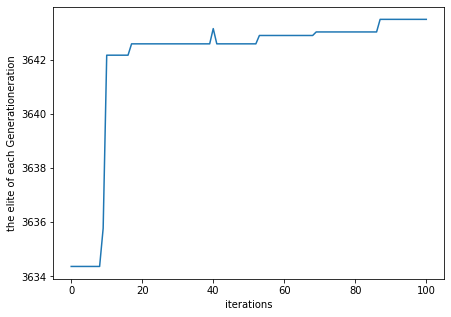

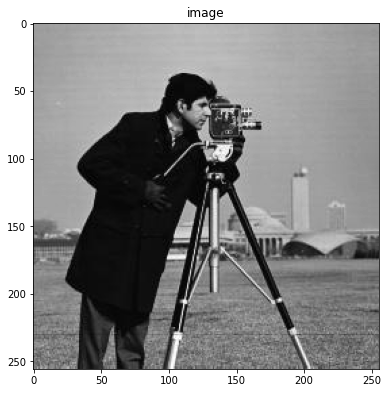

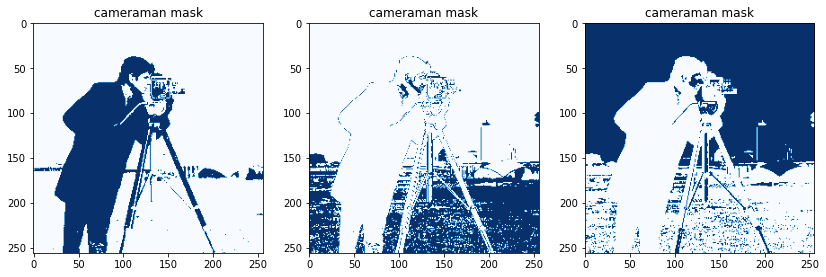

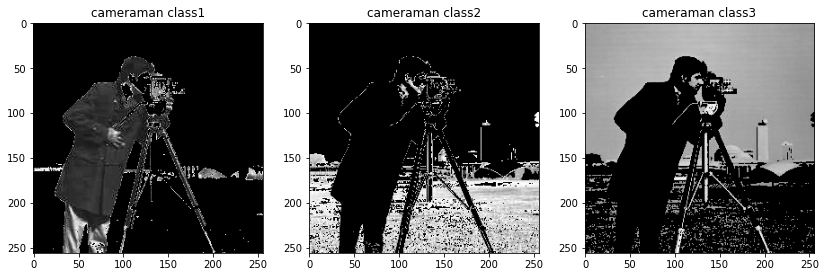

<Figure size 1008x1008 with 0 Axes>

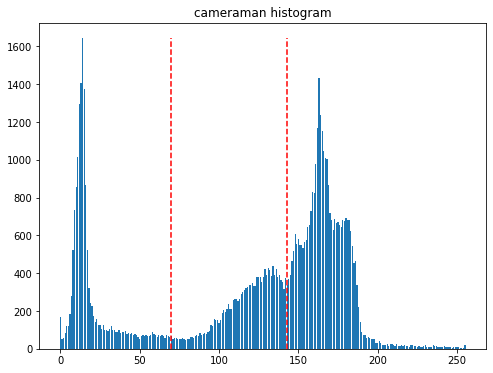

In [63]:
plt.rcParams['figure.figsize'] = (7.0, 5.0) 
cameraman_ga = GA(cameraman, k=3, HSV=3)
cameraman_ga.forward()
plt.rcParams['figure.figsize'] = (14.0, 14.0) 
cameraman_ga.MOstu()
cameraman_ga.visualization('cameraman', 1)
cameraman_ga.plotHist('cameraman histogram')

多阈值分割的思想是利用遗传算法收缩能够使得类间方差最大的k个阈值, 采用的编码方式十分直觉---每8位表示一个阈值, k类生成长度为(k-1)*8长的基因序列, 以此为一个个体, 类间方差大的个体适应度越高, 通过交叉变异产生新个体(自适应调整交叉变异概率), 轮盘赌或竞标赛选择新个体, 同时使用精英解保持, 迭代指定代数后输出最优个体。

可以看到多阈值分割能将cameraman的人、地面、天空同时分割出来, 在直方图显示着阈值分割出三座峰。

#### 2.2 彩色图像 

由于彩色图像有多种处理方法, 为了简洁, 一下只列出视觉分割效果最优的处理解。

迭代进度：0.00%
迭代进度：10.00%
迭代进度：20.00%
迭代进度：30.00%
迭代进度：40.00%
迭代进度：50.00%
迭代进度：60.00%
迭代进度：70.00%
迭代进度：80.00%
迭代进度：90.00%
分成3类
精英解保持：3
各个阈值为： [106 212]
最大方差为：6798
测试用时：1.742345
最优解出现的代数为：63


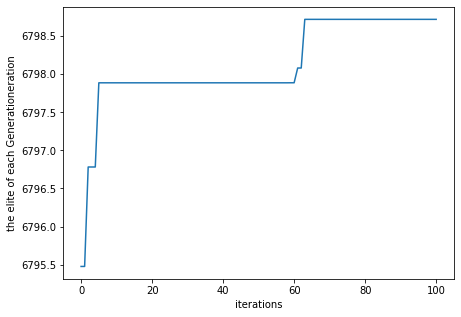

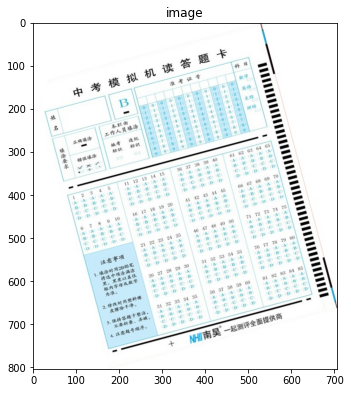

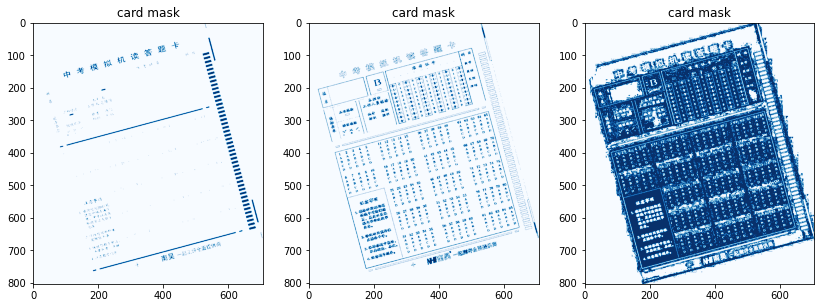

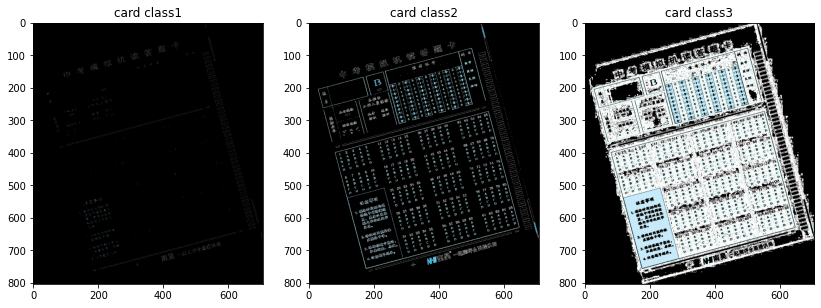

<Figure size 1008x1008 with 0 Axes>

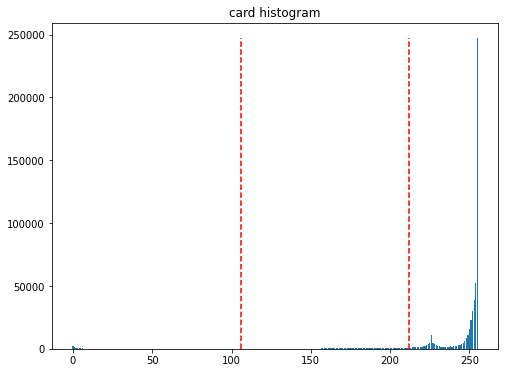

In [70]:
plt.rcParams['figure.figsize'] = (7.0, 5.0) 
#******改这里, k代表类别数; HSV=0是H通道; HSV=1是S通道; HSV=2是V通道; HSV=3是灰度处理; HSV=4是灰度+三通道统计直方图; *******************
card_ga = GA(card, k=3, HSV=3)
# 还可以自定义其他超参数：pop_size:种群大小, P_cross:交叉概率, cross_num:交叉结点数量, P_mutation:变异概率, 
# adaption:自适应概率调整(1为启动), Generation:迭代代数, elite_num:精英解保持数量
#*********************************
card_ga.forward()
plt.rcParams['figure.figsize'] = (14.0, 14.0) 
card_ga.MOstu()
card_ga.visualization('card', 1)
card_ga.plotHist('card histogram')

可以看到(使用灰度处理法)白底、蓝字、黑边都被恰当地分割出来。

迭代进度：0.00%
迭代进度：10.00%
迭代进度：20.00%
迭代进度：30.00%
迭代进度：40.00%
迭代进度：50.00%
迭代进度：60.00%
迭代进度：70.00%
迭代进度：80.00%
迭代进度：90.00%
分成6类
精英解保持：3
各个阈值为： [ 75 118 159 204 226]
最大方差为：4618
测试用时：6.175012
最优解出现的代数为：106


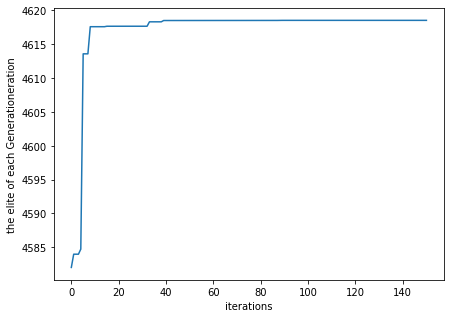

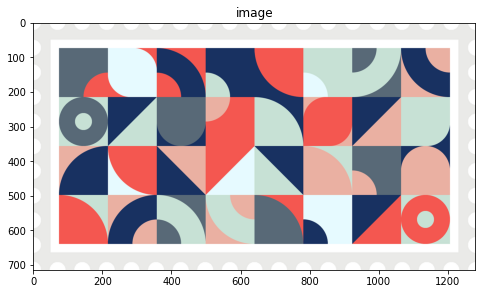

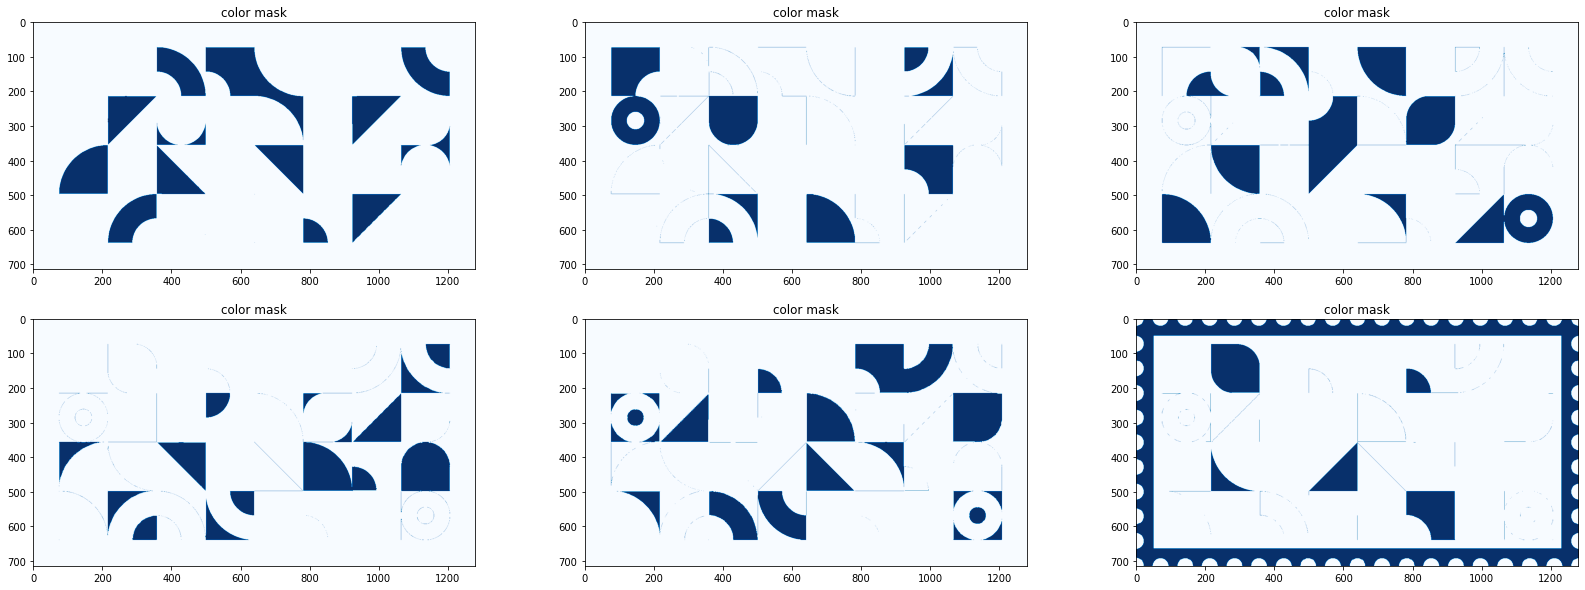

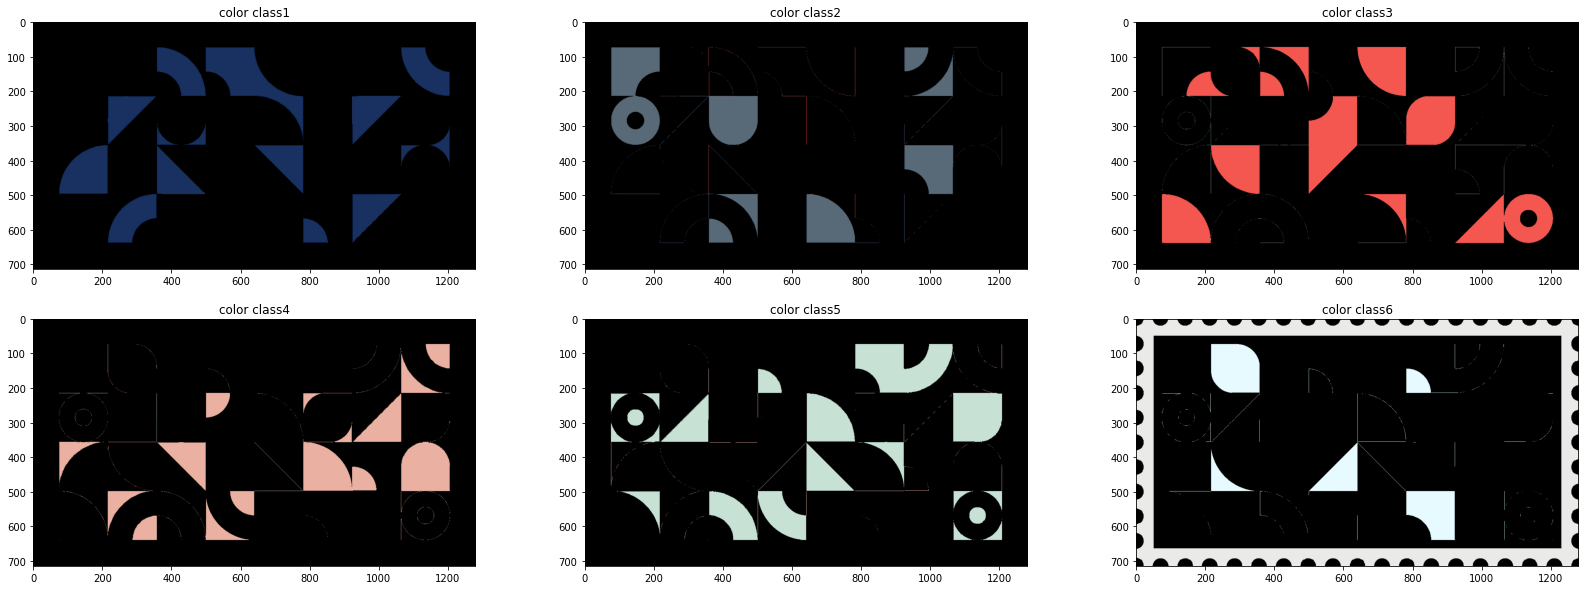

<Figure size 2016x720 with 0 Axes>

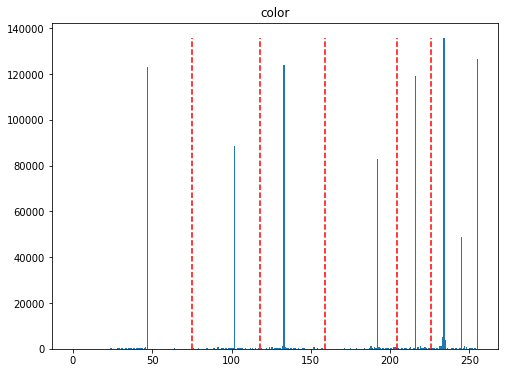

In [75]:
plt.rcParams['figure.figsize'] = (7.0, 5.0) 
color_ga = GA(np.array(color[:,:,0:-1]*255, np.uint8), k=6, HSV=3, Generation=150, pop_size=70, P_mutation=0.25)
color_ga.forward()
plt.rcParams['figure.figsize'] = (28.0, 10.0) 
color_ga.MOstu()
color_ga.visualization('color', 1)
color_ga.plotHist('color')

可以看到(使用灰度处理法)各种颜色块都被恰当地分割出来。

## 四、收获与体会

（1）进一步加深了对阈值分割处理方法的理解。

（2）体会到了单阈值分割的局限性，实现了多阈值分割，由于没有相关了解，因此靠着猜想实施方案：

猜想一：类比k-means算法，通过反复迭代求得多阈值。但是该方案可能存在问题，因为k-means的类中心点是独立更新的，不牵扯其他类别，而基本阈值分割算法要通过左右两个类来更新阈值，这就导致中间的类会被左右两个阈值拉扯，收敛性不能保证。

猜想二：通过扩展Ostu算法，找到多阈值下类间方差最大的解，但随着分类数k增大, 解空间迅速膨胀，因此不宜再采用Ostu的暴力遍历方法。因此选用遗传算法来搜索最优解。

(3) 这次的代码量巨大，考虑的情况颇多，但都逐个实现并封装成类，收获颇丰。